**TASK # 1**

In [5]:
import numpy as np

class SimplePerceptron:
    def __init__(self, input_size, threshold=100, learning_rate=0.5):
        self.threshold = threshold
        self.learning_rate = learning_rate

        # Initialize weights with random values
        self.weights = np.random.rand(input_size + 1)  # Include bias

    def train(self, training_inputs, labels, bias):
        for epoch in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                # Forward pass
                summation = np.dot(inputs, self.weights[1:]) + self.weights[0] + bias

                # Apply step function
                activation = 1 if summation > 0 else 0

                # Update weights
                self.weights[1:] += self.learning_rate * (label - activation) * inputs
                self.weights[0] += self.learning_rate * (label - activation)

                # Print weights after each epoch
                print("Epoch {}, Bias {}: Weights: {}".format(epoch, bias, self.weights))

    def predict(self, inputs, bias):
        # Forward pass
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] + bias

        # Apply step function
        activation = 1 if summation > 0 else 0

        return activation

def main():
    # Input dataset for logical OR gate
    training_inputs = np.array([[0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1]])

    # Output labels for logical OR gate
    labels = np.array([0, 1, 1, 1])

    # Instantiate SimplePerceptron
    perceptron = SimplePerceptron(input_size=2)

    # Bias values to iterate over
    bias_values = [0.1, 0.5, 0.7]

    # Train and predict for each bias value
    for bias in bias_values:
        print("\nTraining and Predictions for Bias:", bias)
        perceptron.train(training_inputs, labels, bias)

        # Make predictions
        for inputs in training_inputs:
            output = perceptron.predict(inputs, bias)
            print("Input:", inputs, "Predicted Output:", output)

if __name__ == "__main__":
    main()



Training and Predictions for Bias: 0.1
Epoch 0, Bias 0.1: Weights: [0.38410713 0.40547581 0.99466006]
Epoch 0, Bias 0.1: Weights: [0.38410713 0.40547581 0.99466006]
Epoch 0, Bias 0.1: Weights: [0.38410713 0.40547581 0.99466006]
Epoch 0, Bias 0.1: Weights: [0.38410713 0.40547581 0.99466006]
Epoch 1, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 1, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 1, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 1, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 2, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 2, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 2, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 2, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 3, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 3, Bias 0.1: Weights: [-0.11589287  0.40547581  0.99466006]
Epoch 3, Bias 0.1: Weights: [-0.11589287  0.4054

# **TASK # 2**

In [4]:
import numpy as np

class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size, threshold=10000, learning_rate=0.1):
        self.threshold = threshold
        self.learning_rate = learning_rate

        # Initialize weights with Xavier initialization
        self.weights_input_hidden = np.random.randn(input_size + 1, hidden_size) * np.sqrt(2 / (input_size + hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size + 1, output_size) * np.sqrt(2 / (hidden_size + output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_inputs, labels):
        # Training loop
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                # Forward pass
                inputs_with_bias = np.append(inputs, 1)  # Add bias term
                hidden_inputs = np.dot(inputs_with_bias, self.weights_input_hidden)
                hidden_outputs = self.sigmoid(hidden_inputs)

                hidden_outputs_with_bias = np.append(hidden_outputs, 1)  # Add bias term
                final_inputs = np.dot(hidden_outputs_with_bias, self.weights_hidden_output)
                final_outputs = self.sigmoid(final_inputs)

                # Backpropagation
                output_error = label - final_outputs
                output_delta = output_error * self.sigmoid_derivative(final_outputs)

                hidden_error = np.dot(output_delta, self.weights_hidden_output[:-1].T)
                hidden_delta = hidden_error * self.sigmoid_derivative(hidden_outputs)

                # Update weights
                self.weights_hidden_output += self.learning_rate * np.outer(hidden_outputs_with_bias, output_delta)
                self.weights_input_hidden += self.learning_rate * np.outer(inputs_with_bias, hidden_delta)

    def predict(self, inputs):
        # Forward pass for prediction
        inputs_with_bias = np.append(inputs, 1)  # Add bias term
        hidden_inputs = np.dot(inputs_with_bias, self.weights_input_hidden)
        hidden_outputs = self.sigmoid(hidden_inputs)

        hidden_outputs_with_bias = np.append(hidden_outputs, 1)  # Add bias term
        final_inputs = np.dot(hidden_outputs_with_bias, self.weights_hidden_output)
        final_outputs = self.sigmoid(final_inputs)

        return final_outputs

def main():
    # XOR gate dataset
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([[0], [1], [1], [0]])

    # Create and train MLP
    mlp = SimpleMLP(input_size=2, hidden_size=8, output_size=1, threshold=10000, learning_rate=0.1)
    mlp.train(training_inputs, labels)

    # Predictions
    for inputs, label in zip(training_inputs, labels):
        predicted_output = mlp.predict(inputs)[0]
        print("Input:", inputs, "Actual Output:", label[0], "Predicted Output:", round(predicted_output))

if __name__ == "__main__":
    main()


Input: [0 0] Actual Output: 0 Predicted Output: 0
Input: [0 1] Actual Output: 1 Predicted Output: 1
Input: [1 0] Actual Output: 1 Predicted Output: 1
Input: [1 1] Actual Output: 0 Predicted Output: 0


# **Task # 3**

Epoch 1/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2775 - accuracy: 0.9216 - val_loss: 0.1275 - val_accuracy: 0.9660
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1220 - accuracy: 0.9637 - val_loss: 0.0968 - val_accuracy: 0.9732
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0834 - accuracy: 0.9749 - val_loss: 0.0830 - val_accuracy: 0.9765
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 0.0757 - val_accuracy: 0.9790
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9767
Test accuracy: 0.9767000079154968
1/1 [==============================] - 0s 22ms/step


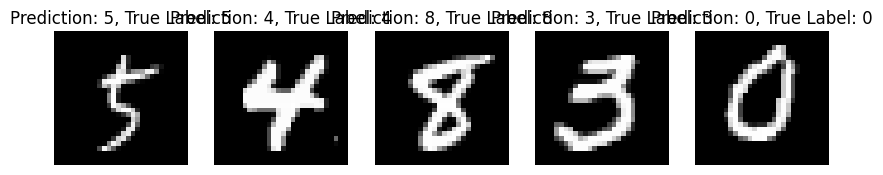

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import random

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

# Model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.1)

# Model evaluation
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict on random images
num_examples = 5
plt.figure(figsize=(10, 4))
for i in range(num_examples):
    random_index = random.randint(0, len(test_images) - 1)
    random_image = test_images[random_index]
    random_label = test_labels[random_index]
    prediction = model.predict(np.expand_dims(random_image, axis=0))

    plt.subplot(1, num_examples, i + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title(f"Prediction: {np.argmax(prediction)}, True Label: {random_label}")
    plt.axis('off')
plt.show()
